# 1. BUSINESS UNDERSTANDING

With the rapid development of Artificial Intelligence (AI) in recent years, AI has been used in a variety of industries. Such as data mining, manufacturing, and financial services. By building the right models, humans can use AI to perform many tasks that once required complex human intervention. One of the most notable applications is the use of AI in healthcare.

Pneumonia is a serious lung infection that can affect people of all ages, but it is especially dangerous for the elderly, young children, and those with weakened immune systems. The traditional method for diagnosing pneumonia is through a physical examination and laboratory tests, but these methods are time-consuming and frequently require multiple visits to the doctor. This project aims to solve this real-world problem by developing a model that can accurately classify whether a patient has pneumonia based on a chest x-ray image.

This project is important for healthcare professionals and patients who need to get the right diagnosis quickly. Doctors like radiologists and ophthalmologists can use the deep learning model to help them diagnose different medical conditions using medical images. Accurate diagnoses help patients get the right treatment and have better health.

There are different groups of people who have an interest in using deep learning for medical imaging. They include healthcare professionals, patients, hospitals, medical device manufacturers, and insurance companies. Doctors can use deep learning to identify pneumonia cases in medical images more accurately. Patients benefit from accurate diagnoses and treatments. Hospitals can use deep learning to diagnose and treat medical conditions better and use resources more efficiently. Medical device manufacturers can use deep learning to make products that diagnose medical conditions more accurately and efficiently. Insurance companies can save money and improve the health of their customers by using deep learning to make diagnoses more accurate.

Researchers, academics, and government agencies are other stakeholders that may be interested in the development of deep learning models for medical imaging. Researchers can use the models to learn more about diseases and develop new treatments. Government agencies can regulate the use of deep learning in healthcare to make sure it is safe and effective.


## 1.2. Technical Objectives
1. Build a deep learning model that can classify whether a given patient has pneumonia based on a chest x-ray image.
2. Optimize the model architecture and hyperparameters to achieve the highest possible accuracy on the validation set.
3. Use data augmentation techniques to increase the size of the training dataset and improve the model's ability to generalize.
3. Experiment with different optimization algorithms, learning rates, and batch sizes to improve the speed and stability of model training.
4. Evaluate the model's performance using precision, recall, and F1 score.

## 1.3. Business Objectives
1. Provide pediatricians with a tool that can quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Increase the accessibility of pneumonia diagnosis in low-resource settings where trained medical professionals may not be readily available.
3. Potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. Contribute to the development of a larger dataset for pneumonia diagnosis that can be used for further research and model development.
5. Develop a model that can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

## 1.3. Success Metrics

The model will be considered a success if the the metrics score is above 0.9.

1. Precision: The precision metric measures how well the model is able to correctly identify pneumonia cases out of all the samples it predicts as positive. A high precision score indicates that the model is accurate in its positive predictions. To achieve high precision, the model should minimize false positives. For our project, **"the proportion of correctly classified pneumonia cases out of all the samples predicted as pneumonia".**

2. Recall: The recall metric measures how well the model is able to correctly identify pneumonia cases out of all the actual pneumonia cases in the dataset. A high recall score indicates that the model is sensitive to the pneumonia class. To achieve high recall, the model should minimize false negatives. For this project we define its as, **"the proportion of correctly classified pneumonia cases out of all the actual pneumonia cases in the dataset".**

3. F1 Score: The F1 score is a harmonic mean of precision and recall and provides a combined measure of the model's accuracy and sensitivity. It can be useful when you want to balance the importance of correctly identifying both the majority and minority classes. For our case, **"the harmonic mean of precision and recall".**

# 2. RELATED WORK
There has been a significant amount of related work on using deep learning models for pneumonia diagnosis from chest x-ray images. Here are a few examples:

1. Wang et al. (2017) developed a deep learning model based on the Inception architecture to diagnose pneumonia from chest x-ray images. Their model achieved an area under the receiver operating characteristic curve (AUC) of 0.92 on a test set of 279 images, outperforming several other models.
2. Rajpurkar et al. (2017) released a large dataset of chest x-ray images labeled with various pathologies, including pneumonia. They also developed a deep learning model based on the CheXNet architecture that achieved state-of-the-art performance on the task of pneumonia detection.
3. Wang et al. (2018) developed a deep learning model based on the DenseNet architecture that could classify chest x-ray images into various pathologies, including pneumonia. Their model achieved an AUC of 0.887 on a test set of 420 images, outperforming several other models.
4. Chouhan et al. (2020) developed a deep learning model based on the EfficientNet architecture to diagnose pneumonia from chest x-ray images. Their model achieved an accuracy of 95.8% on a test set of 234 images, outperforming several other models.

These studies demonstrate the effectiveness of deep learning models for pneumonia diagnosis from chest x-ray images, as well as the potential for further improvement in accuracy and performance. They also highlight the importance of having access to large and diverse datasets for model training and evaluation.

# 3. DATA UNDERSTANDING

The data source for this project is  Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3.The dataset contains 5,847 Chest X-Ray images from patients, with 1,574 images labeled as **normal** and 4,273 images labeled as **pneumonia**.The data can be found [here](https://data.mendeley.com/datasets/rscbjbr9sj/3)

The data is suitable for the project because it contains labeled medical images that can be used to train a deep learning model to accurately classify medical conditions. Medical imaging is an important tool for diagnosing and treating diseases, and accurate and timely diagnoses are critical for improving patient outcomes.

Descriptive statistics for the features used in the analysis are not applicable in this case since the images are not numerical data. Instead, image pre-processing techniques are applied to transform the images into numerical data that can be used to train a deep learning model.


## 3.1. Importing Libraries

>Relevant libraries.

In [33]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split

import cv2
import gc
import os

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.applications import ResNet50, vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')


## 3.2. Load Data

>Path to train,validation and test directories

In [3]:
# Full Training data directories
train_path = '/home/munyao/Desktop/deku/chest_data/train/'
# Testing data
test_path = "/home/munyao/Desktop/deku/chest_data/test"
# Validation data
val_path = "/home/munyao/Desktop/deku/chest_data/val"

# # Directories for half the data
# train_dir_half = '/home/munyao/Desktop/deku/chest_data/train_half'
# val_dir_half = '/home/munyao/Desktop/deku/chest_data/val_half'
# test_dir_half = '/home/munyao/Desktop/deku/chest_data/test_half'


## 3.3. Data Visualization

### 3.3.1. Data Classes

In [4]:
# Visualise the classes in data
classes = os.listdir(train_path)
# Display the image classes
classes

['NORMAL', 'PNEUMONIA']

### 3.3.2. Visualise Sample Images

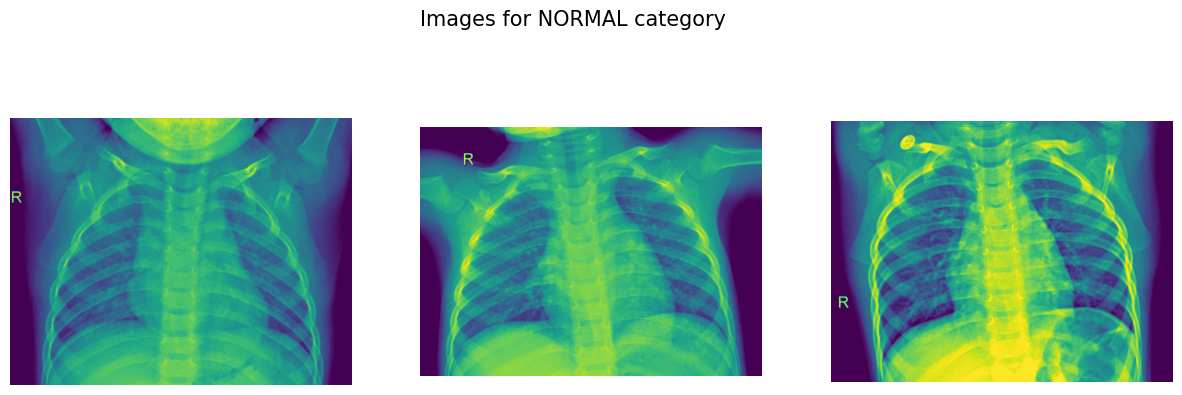

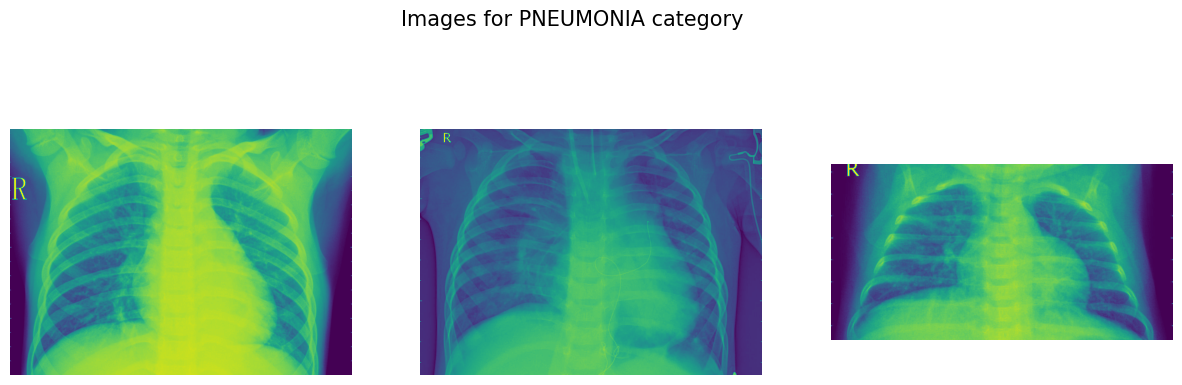

In [5]:
# Load data to view sample images
path = train_path
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=15)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

### 3.3.3. Visualize Class Distribution

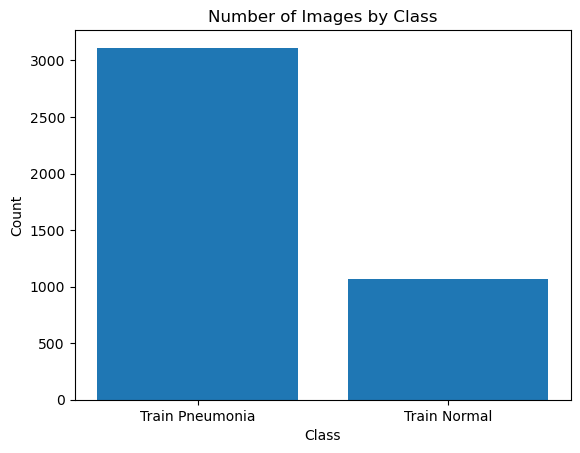

In [6]:
# Path to class pneumonia 
pneu_train_path = train_path+'PNEUMONIA'
# Path to class normal
norm_train_path = train_path+'NORMAL'

# Get the class distribution
number_classes = {'Train Pneumonia': len(os.listdir(pneu_train_path)),
                  'Train Normal': len(os.listdir(norm_train_path))}

plt.bar(number_classes.keys(), number_classes.values())
plt.title("Number of Images by Class")
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

### 3.3.4. Images to Matrices

In [7]:
# Making n X m matrix
normal_imgs = [fn for fn in os.listdir(f'{norm_train_path}') if fn.endswith('.jpeg')]
pneumo_imgs = [fn for fn in os.listdir(f'{pneu_train_path}') if fn.endswith('.jpeg')]

def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

>This function will iterate through each file and convert it to a (n, m) matrix, where n represents the number of observations and m represents the number of pixels.

### 3.3.5. Average Image for each  Class

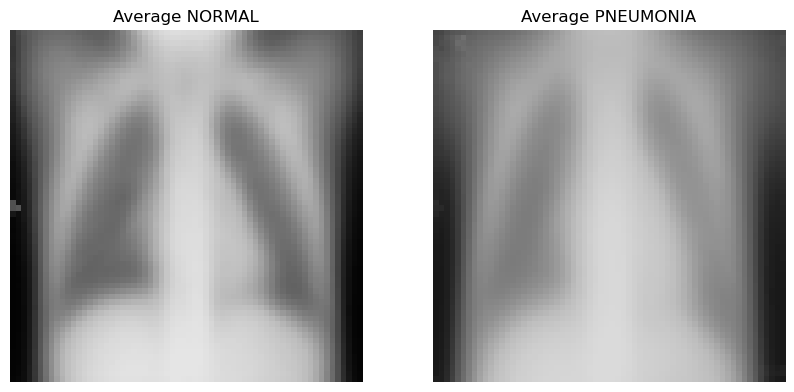

In [8]:
# Matrices train data
normal_images = img2np(f'{train_path}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_path}/PNEUMONIA/', pneumo_imgs)

def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

norm_mean = find_mean_img(normal_images, 'NORMAL')
axs[0].imshow(norm_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[0].set_title('Average NORMAL')
axs[0].axis('off')

pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')
axs[1].imshow(pneu_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[1].set_title('Average PNEUMONIA')
axs[1].axis('off')

plt.show()


>The average image shows that pneumonia X-rays have more obstruction around the chest area.

### 3.3.6. Contrast Between the Classes

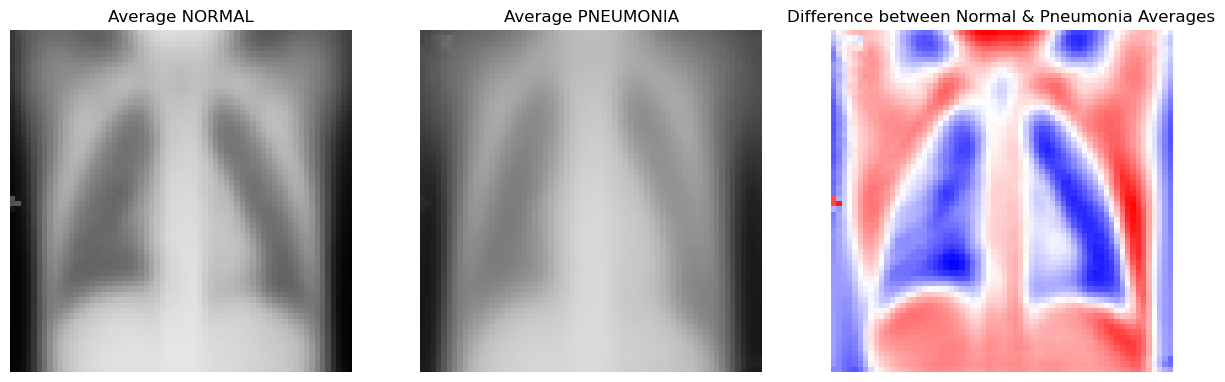

In [9]:
# Plot contrast 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

norm_mean = find_mean_img(normal_images, 'NORMAL')
axs[0].imshow(norm_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[0].set_title('Average NORMAL')
axs[0].axis('off')

pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')
axs[1].imshow(pneu_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[1].set_title('Average PNEUMONIA')
axs[1].axis('off')

contrast_mean = norm_mean - pneu_mean
axs[2].imshow(contrast_mean, cmap='bwr')
axs[2].set_title('Difference between Normal & Pneumonia Averages')
axs[2].axis('off')

plt.show()


# 4. DATA PREPARATION
Data preprocessing is an important step in building a machine learning model, especially when it comes to medical image classification tasks such as pneumonia classification for our case. The preprocessing steps can help improve the accuracy and generalizability of the model by cleaning and transforming the data to make it more suitable for training the model.


## 4.1. Data Augmentation 

The augmentation parameters provided are used to perform data augmentation on images, which is a common technique used in deep learning to increase the size of a dataset and improve model performance. The parameters include rescaling the image values to be between 0 and 1, rotating the image by up to 20 degrees, shifting the image horizontally and vertically by up to 20% of the image size, shearing the image by up to 20%, zooming into the image by up to 20%, flipping the image horizontally, and filling in any empty space with the nearest pixel value. These augmentations help to create more variability in the dataset, which can improve the model's ability to generalize to new data.

>Function that takes in the data path and the augmentation parameters you provided, performs data augmentation on the images in that path, and then displays a grid of four images: the original image and three randomly augmented images.


In [10]:
# Define function
def display_augmented_images(data, augmentation_params):
    # Define image generator with augmentation parameters
    datagen = ImageDataGenerator(**augmentation_params)

    # Apply augmentation to the data
    augmented_data = datagen.flow(data, batch_size=len(data), shuffle=False).next()

    # Normalize pixel values to the range [0, 1]
    data = data.astype('float32') / 255.0
    augmented_data = augmented_data.astype('float32') / 255.0

    # Display the original and augmented images in a grid
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[0])
    axs[0].set_title('Original Image')
    axs[1].imshow(augmented_data[0])
    axs[1].set_title('Augmented Image')

    plt.tight_layout()

    # Show images
    plt.show()

### 4.1.1. Visualize Augmented Image

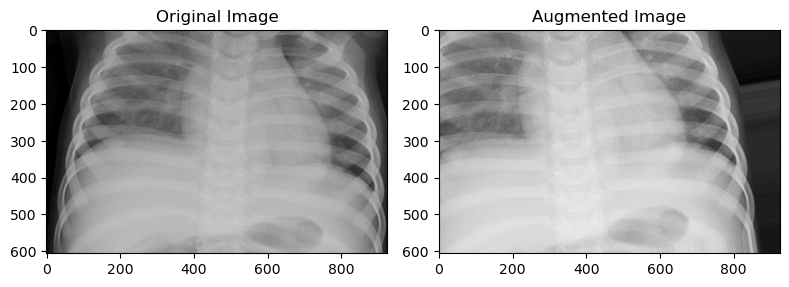

In [14]:
# Image to apply augmentation
data = np.array([plt.imread(os.path.join(pneu_train_path, f)) for f in os.listdir(pneu_train_path)[:1]])

# Augmentation params
augmentation_params = {
    'rotation_range': 15,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'vertical_flip': True,
    'brightness_range': (0.8, 1.2)
}

# Call the function
display_augmented_images(data, augmentation_params)

## 4.2. Data Preprocess

In [15]:
# Define the batch size and image dimensions
batch_size = 32
img_height = 150
img_width = 150

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest')

# Create an ImageDataGenerator object for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create a validation data generator
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create an ImageDataGenerator object for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



Found 4177 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 5. MODELING

* CNN - custom design architecture.

* ResNet50 - pre-trained ResNet50 

### 5.1. Model_1 Architecture
    CNN  
CNN has  built-in convolutional layer reduces the high dimensionality of images without losing its information
It is well-suited for pneumonia classification as they can learn to automatically extract features from images by using convolutional layers. These layers apply a set of filters to the image, each filter learning to detect a different feature, such as edges, corners, or other shapes.

In pneumonia classification, the CNN can learn to identify patterns in chest X-rays that are indicative of pneumonia, such as the presence of fluid or inflammation in the lungs. By training the CNN on a large dataset of labeled chest X-rays, the model can learn to accurately classify new images as either pneumonia-positive or pneumonia-negative.

The model consists of three convolutional layers with increasing numbers of filters (64, 128, and 128), followed by max pooling layers to reduce the spatial dimensions of the output feature maps. The flattened output is then fed into two fully connected layers (Dense), one with 256 neurons and the other with a single neuron (since it is a binary classification problem).

The activation function used in the hidden layers is the rectified linear unit (ReLU), and the output layer uses the sigmoid function to output probabilities of the input belonging to the positive class (pneumonia) or negative class (not pneumonia). The dropout regularization with a rate of 0.25 is applied after the first dense layer to prevent overfitting.

In [ ]:
# Add layers
Model_1 = Sequential()
Model_1.add(Conv2D(64, (2, 2),strides=1, input_shape=(150, 150, 3), activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Conv2D(128, (2, 2),strides=2, activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Conv2D(128, (3, 3), activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Flatten())
Model_1.add(Dense(256, activation = "relu"))
Model_1.add(Dropout(0.25))
Model_1.add(Dense(1, activation = "sigmoid"))


#### Metrics

In [18]:
# Metrics
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    recall = recall(y_true, y_pred)
    precision = precision(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [21]:
# Compile
Model_1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), 
                metrics=['accuracy', f1_score, tf.metrics.Recall()])


In [26]:
# Train the model using the training data
model_hist_1 = Model_1.fit(train_generator, epochs=30, validation_data=val_generator)


Epoch 1/10
131/131 [==============================] - 190s 1s/step - loss: 0.5655 - accuracy: 0.7460 - f1_score: 0.8519 - recall: 1.0000 - val_loss: 0.5055 - val_accuracy: 0.7407 - val_f1_score: 0.8473 - val_recall: 0.9987
Epoch 2/10
131/131 [==============================] - 187s 1s/step - loss: 0.4800 - accuracy: 0.7747 - f1_score: 0.8602 - recall: 0.9528 - val_loss: 0.3882 - val_accuracy: 0.7847 - val_f1_score: 0.8689 - val_recall: 0.9805
Epoch 3/10
131/131 [==============================] - 193s 1s/step - loss: 0.4012 - accuracy: 0.8171 - f1_score: 0.8800 - recall: 0.9213 - val_loss: 0.2791 - val_accuracy: 0.8708 - val_f1_score: 0.9132 - val_recall: 0.9481
Epoch 4/10
131/131 [==============================] - 193s 1s/step - loss: 0.3382 - accuracy: 0.8461 - f1_score: 0.8959 - recall: 0.9158 - val_loss: 0.5754 - val_accuracy: 0.6967 - val_f1_score: 0.7383 - val_recall: 0.5883
Epoch 5/10
131/131 [==============================] - 213s 2s/step - loss: 0.3118 - accuracy: 0.8638 - f1_sc

>The model seems to perform well, achieving an accuracy of 92.44% on the validation set after 10 epochs. The f1-score and recall metrics are also quite high, indicating that the model is able to correctly identify positive cases while minimizing false negatives. The loss values are also decreasing with each epoch, which is a good sign that the model is learning and improving. However, it is important to note that the model may be overfitting as the validation loss is lower than the training loss in some epochs.
>After attaining a minimum value, the error rate starts increasing again. This happens due to the exploding and vanishing gradient descent problem which also causes overfitting of the model, hence increasing the error.To overcome this error we introduce a second model.

## 5.2 Model_2 Architecture
    ResNet50 (Residual Neural Network)

This is a CNN model based on the ResNet50 architecture. It consists of a pre-trained ResNet50 base model followed by a few additional layers, including a global average pooling layer, a dense layer with 128 units and ReLU activation, and a dense output layer with a sigmoid activation.

The model can learn to identify important features in the chest X-ray images, such as areas of consolidation or opacity, that are indicative of pneumonia.    

#### Metrics

In [22]:
import math
# Define F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return (2 * p * r) / (p + r + 1e-12)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()


In [23]:
# Model
base_model = ResNet50(include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_2 = Model(inputs=base_model.input, outputs=predictions)


In [56]:
# Compile model        
train_steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps_per_epoch = math.ceil(len(test_generator) / batch_size)

# Compile the model with F1 score metric
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', F1Score(), Recall()])

# Train the model
history_2 = model_2.fit(train_generator, 
                        steps_per_epoch=train_steps_per_epoch, 
                        epochs=20, 
                        validation_data=test_generator, 
                        validation_steps=val_steps_per_epoch)


Epoch 1/5
130/130 [==============================] - 1068s 8s/step - loss: 0.2615 - accuracy: 0.9011 - f1_score: 0.9331 - recall_8: 0.9268 - val_loss: 8.4594 - val_accuracy: 0.6562 - val_f1_score: 0.7925 - val_recall_8: 1.0000
Epoch 2/5
130/130 [==============================] - 994s 8s/step - loss: 0.1862 - accuracy: 0.9252 - f1_score: 0.9495 - recall_8: 0.9440 - val_loss: 15.4842 - val_accuracy: 0.5312 - val_f1_score: 0.6939 - val_recall_8: 1.0000
Epoch 3/5
130/130 [==============================] - 1430s 11s/step - loss: 0.1716 - accuracy: 0.9361 - f1_score: 0.9571 - recall_8: 0.9579 - val_loss: 3.1090 - val_accuracy: 0.5938 - val_f1_score: 0.7451 - val_recall_8: 1.0000
Epoch 4/5
130/130 [==============================] - 1471s 11s/step - loss: 0.1479 - accuracy: 0.9467 - f1_score: 0.9642 - recall_8: 0.9621 - val_loss: 3.9739 - val_accuracy: 0.6250 - val_f1_score: 0.7692 - val_recall_8: 1.0000
Epoch 5/5
130/130 [==============================] - 1471s 11s/step - loss: 0.1712 - accur

>The loss and accuracy metrics suggest that the model was able to learn from the training data and improve its performance over the 5 epochs. However, the validation metrics suggest that the model may be overfitting to the training data, as the validation loss is consistently higher than the training loss, and the validation accuracy is consistently lower than the training accuracy. This may indicate a need for additional regularization techniques to prevent overfitting, such as dropout or weight regularization. 

## 5.3. Model Tuning

We aim to develop a highly accurate model for a binary classification task on image data. To achieve this goal, we started with a pre-trained VGG16 model and added new trainable layers to it. We then experimented with different hyperparameters to find the best combination that produced the highest accuracy on the test data.



### 5.3.1. Model_1 Tuning

* EarlyStopping function is monitoring the validation loss and will stop the training process if the validation loss does not improve for three consecutive epochs. 
* The verbose parameter determines whether to print messages during training, and the mode parameter determines whether to minimize or maximize the monitored metric. 
* The callback function is passed to the fit function using the callbacks parameter.


In [81]:
# Fine tune model_1
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
Model_1.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[earlystop])


Epoch 1/10
131/131 [==============================] - 211s 2s/step - loss: 0.2439 - accuracy: 0.8987 - f1_score: 0.9304 - recall: 0.9280 - val_loss: 0.2465 - val_accuracy: 0.8947 - val_f1_score: 0.9211 - val_recall: 0.8701
Epoch 2/10
131/131 [==============================] - 211s 2s/step - loss: 0.2359 - accuracy: 0.8985 - f1_score: 0.9308 - recall: 0.9290 - val_loss: 0.2042 - val_accuracy: 0.9263 - val_f1_score: 0.9492 - val_recall: 0.9532
Epoch 3/10
131/131 [==============================] - 214s 2s/step - loss: 0.2267 - accuracy: 0.9066 - f1_score: 0.9360 - recall: 0.9358 - val_loss: 0.2467 - val_accuracy: 0.8900 - val_f1_score: 0.9174 - val_recall: 0.8610
Epoch 4/10
131/131 [==============================] - 215s 2s/step - loss: 0.2564 - accuracy: 0.8961 - f1_score: 0.9282 - recall: 0.9287 - val_loss: 0.2356 - val_accuracy: 0.8957 - val_f1_score: 0.9218 - val_recall: 0.8714
Epoch 5/10
131/131 [==============================] - 217s 2s/step - loss: 0.2279 - accuracy: 0.9105 - f1_sc

### 5.3.2 Model_2 Tuning

* Add more regularization: We can increase the amount of regularization by increasing the L2 regularization penalty in the dense layer and increasing the dropout rate. This will help to reduce the complexity of the model and prevent it from overfitting the data.

* Fine-tune the model: We can unfreeze some of the layers in the base model and fine-tune the model on the training data. This will allow the model to learn more complex features from the data and improve its performance on the validation set.



In [26]:
# Modeling
base_model = ResNet50(include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x) # Increase L2 regularization penalty
x = Dropout(0.6)(x) # Increase dropout rate
predictions = Dense(1, activation='sigmoid')(x)

tuned_model_2 = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers of the base model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model with desired optimizer, loss and metrics
tuned_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', F1Score(), Recall()])

# Train the model with more epochs
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
tuned_model2_history = tuned_model_2.fit(train_generator, steps_per_epoch=train_steps_per_epoch, 
                        epochs=10, validation_data=val_generator, 
                        validation_steps=val_steps_per_epoch, callbacks=[earlystop])


### 5.4 Compile Tuned Models

Both models are compiled with Adam optimizer, binary cross-entropy loss function, and accuracy, recall, and F1-score as metrics.
Both models are trained with fit method on the training data set for 10 epochs and evaluated on the validation data set.
We compare the two models based on three factors: complexity, interpretability, and computational resources. The complexity is measured by the number of parameters in each model. The interpretability is measured by printing the model summary. The computational resources are measured by the training time.


In [27]:
# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training')

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation')

# Compile both models with the same optimizer, loss function, and metrics
Model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), F1Score()])
tuned_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), F1Score()])

# Train both models
history_a = Model_1.fit(train_generator, epochs=10, validation_data=val_generator)
history_b = tuned_model_2.fit(train_generator, epochs=10, validation_data=val_generator)


Found 3343 images belonging to 2 classes.
Found 209 images belonging to 2 classes.
Epoch 1/10
105/105 [==============================] - 124s 1s/step - loss: 0.3547 - accuracy: 0.8477 - recall_3: 0.9506 - f1_score: 0.9030 - val_loss: 0.1861 - val_accuracy: 0.9330 - val_recall_3: 0.9805 - val_f1_score: 0.9557
Epoch 2/10
105/105 [==============================] - 124s 1s/step - loss: 0.1474 - accuracy: 0.9396 - recall_3: 0.9582 - f1_score: 0.9594 - val_loss: 0.1225 - val_accuracy: 0.9617 - val_recall_3: 0.9675 - val_f1_score: 0.9739
Epoch 3/10
105/105 [==============================] - 123s 1s/step - loss: 0.1101 - accuracy: 0.9599 - recall_3: 0.9723 - f1_score: 0.9731 - val_loss: 0.1260 - val_accuracy: 0.9617 - val_recall_3: 0.9545 - val_f1_score: 0.9735
Epoch 4/10
105/105 [==============================] - 128s 1s/step - loss: 0.0850 - accuracy: 0.9671 - recall_3: 0.9767 - f1_score: 0.9779 - val_loss: 0.1069 - val_accuracy: 0.9617 - val_recall_3: 0.9610 - val_f1_score: 0.9737
Epoch 5/1

                                                                                                  
 pool1_pool (MaxPooling2D)      (None, 38, 38, 64)   0           ['pool1_pad[0][0]']              
                                                                                                  
 conv2_block1_1_conv (Conv2D)   (None, 38, 38, 64)   4160        ['pool1_pool[0][0]']             
                                                                                                  
 conv2_block1_1_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block1_1_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv2_block3_out (Activation)  (None, 38, 38, 256)  0           ['conv2_block3_add[0][0]']       
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, 19, 19, 128)  32896       ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block3_out (Activation)  (None, 19, 19, 512)  0           ['conv3_block3_add[0][0]']       
                                                                                                  
 conv3_block4_1_conv (Conv2D)   (None, 19, 19, 128)  65664       ['conv3_block3_out[0][0]']       
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block4_1_bn[0][0]']      
 n)                                                                                               
          

 ization)                       )                                                                 
                                                                                                  
 conv4_block2_add (Add)         (None, 10, 10, 1024  0           ['conv4_block1_out[0][0]',       
                                )                                 'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_block2_out (Activation)  (None, 10, 10, 1024  0           ['conv4_block2_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 10, 10, 256)  262400      ['conv4_block2_out[0][0]']       
                                                                                                  
 conv4_blo

 conv4_block5_3_bn (BatchNormal  (None, 10, 10, 1024  4096       ['conv4_block5_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block5_add (Add)         (None, 10, 10, 1024  0           ['conv4_block4_out[0][0]',       
                                )                                 'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_block5_out (Activation)  (None, 10, 10, 1024  0           ['conv4_block5_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block6_1_conv (Conv2D)   (None, 10, 10, 256)  262400      ['conv4_block5_out[0][0]']       
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 5, 5, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 5, 5, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 5, 5, 2048)   0           ['conv5_block2_add[0][0]']       
          

KeyError: 'time'

### 5.5. Compare Tuned Models

>The evaluation allows us to compare the performance of the two models on the unseen test set. This is important to ensure that the models generalize well to new data. The results can also provide insights into the strengths and weaknesses of each model, which can is useful for selecting the best one for a our application.

### 5.6 Metrics Evaluation
Both models are trained on the training set and evaluated on the test set using metrics: test loss, test accuracy, test F1 score, test recall and precision. The results are summarized in a dataframe, where each row represents a model and each column represents a metric.

In [34]:
# Compare the two tuned models
test_loss_1, test_acc_1, test_f1_1, test_recall_1 = Model_1.evaluate(test_generator)
test_loss_2, test_acc_2, test_f1_2, test_recall_2 = tuned_model_2.evaluate(test_generator)

results = {
    'Model': ['Model 1', 'Model 2'],
    'Test Loss': [test_loss_1, test_loss_2],
    'Test Accuracy': [test_acc_1, test_acc_2],
    'Test F1 Score': [test_f1_1, test_f1_2],
    'Test Recall': [test_recall_1, test_recall_2],
}
# Df for the results
results_df = pd.DataFrame(results)

# Get predictions for model 1 and calculate precision
model_1_preds = Model_1.predict(test_generator)
model_1_preds = np.round(model_1_preds)
precision_1 = precision_score(test_generator.labels, model_1_preds)

# Get predictions for model 2 and calculate precision
model_2_preds = tuned_model_2.predict(test_generator)
model_2_preds = np.round(model_2_preds)
precision_2 = precision_score(test_generator.labels, model_2_preds)

# Add precision to the results dataframe
results_df['Test Precision'] = [precision_1, precision_2]

# DF
results_df


20/20 [==============================] - 65s 3s/step


,Model,Test Loss,Test Accuracy,Test F1 Score,Test Recall,Test Precision
0,Model 1,0.483971,0.883013,0.994872,0.914016,0.603486
1,Model 2,1.231155,0.597756,0.356410,0.525520,0.661871


### 5.6. Model Selection

Best model was model_1 and save as deku

In [36]:
# Save the model
Model_1.save('deku.h5')


### Visualize Convolution Layers

In [82]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Create a new model that outputs the output of each layer
layer_outputs = [layer.output for layer in base_model.layers[:18]]  # only use the first 18 layers
activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

def visualize_activations(img_path):
    # Get an example image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get the activations for each layer
    activations = activation_model.predict(x)

    # Visualize the activations for each layer
    fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,30))
    for i, activation in enumerate(activations):
        row = i // 3
        col = i % 3
        axs[row, col].matshow(activation[0, :, :, 1], cmap='viridis')  # visualize the 2nd channel
        axs[row, col].set_title(f'Layers {i+1}-{i+3}')

    # Show subplots    
    plt.show()



#### Normal image

1/1 [==============================] - 1s 525ms/step


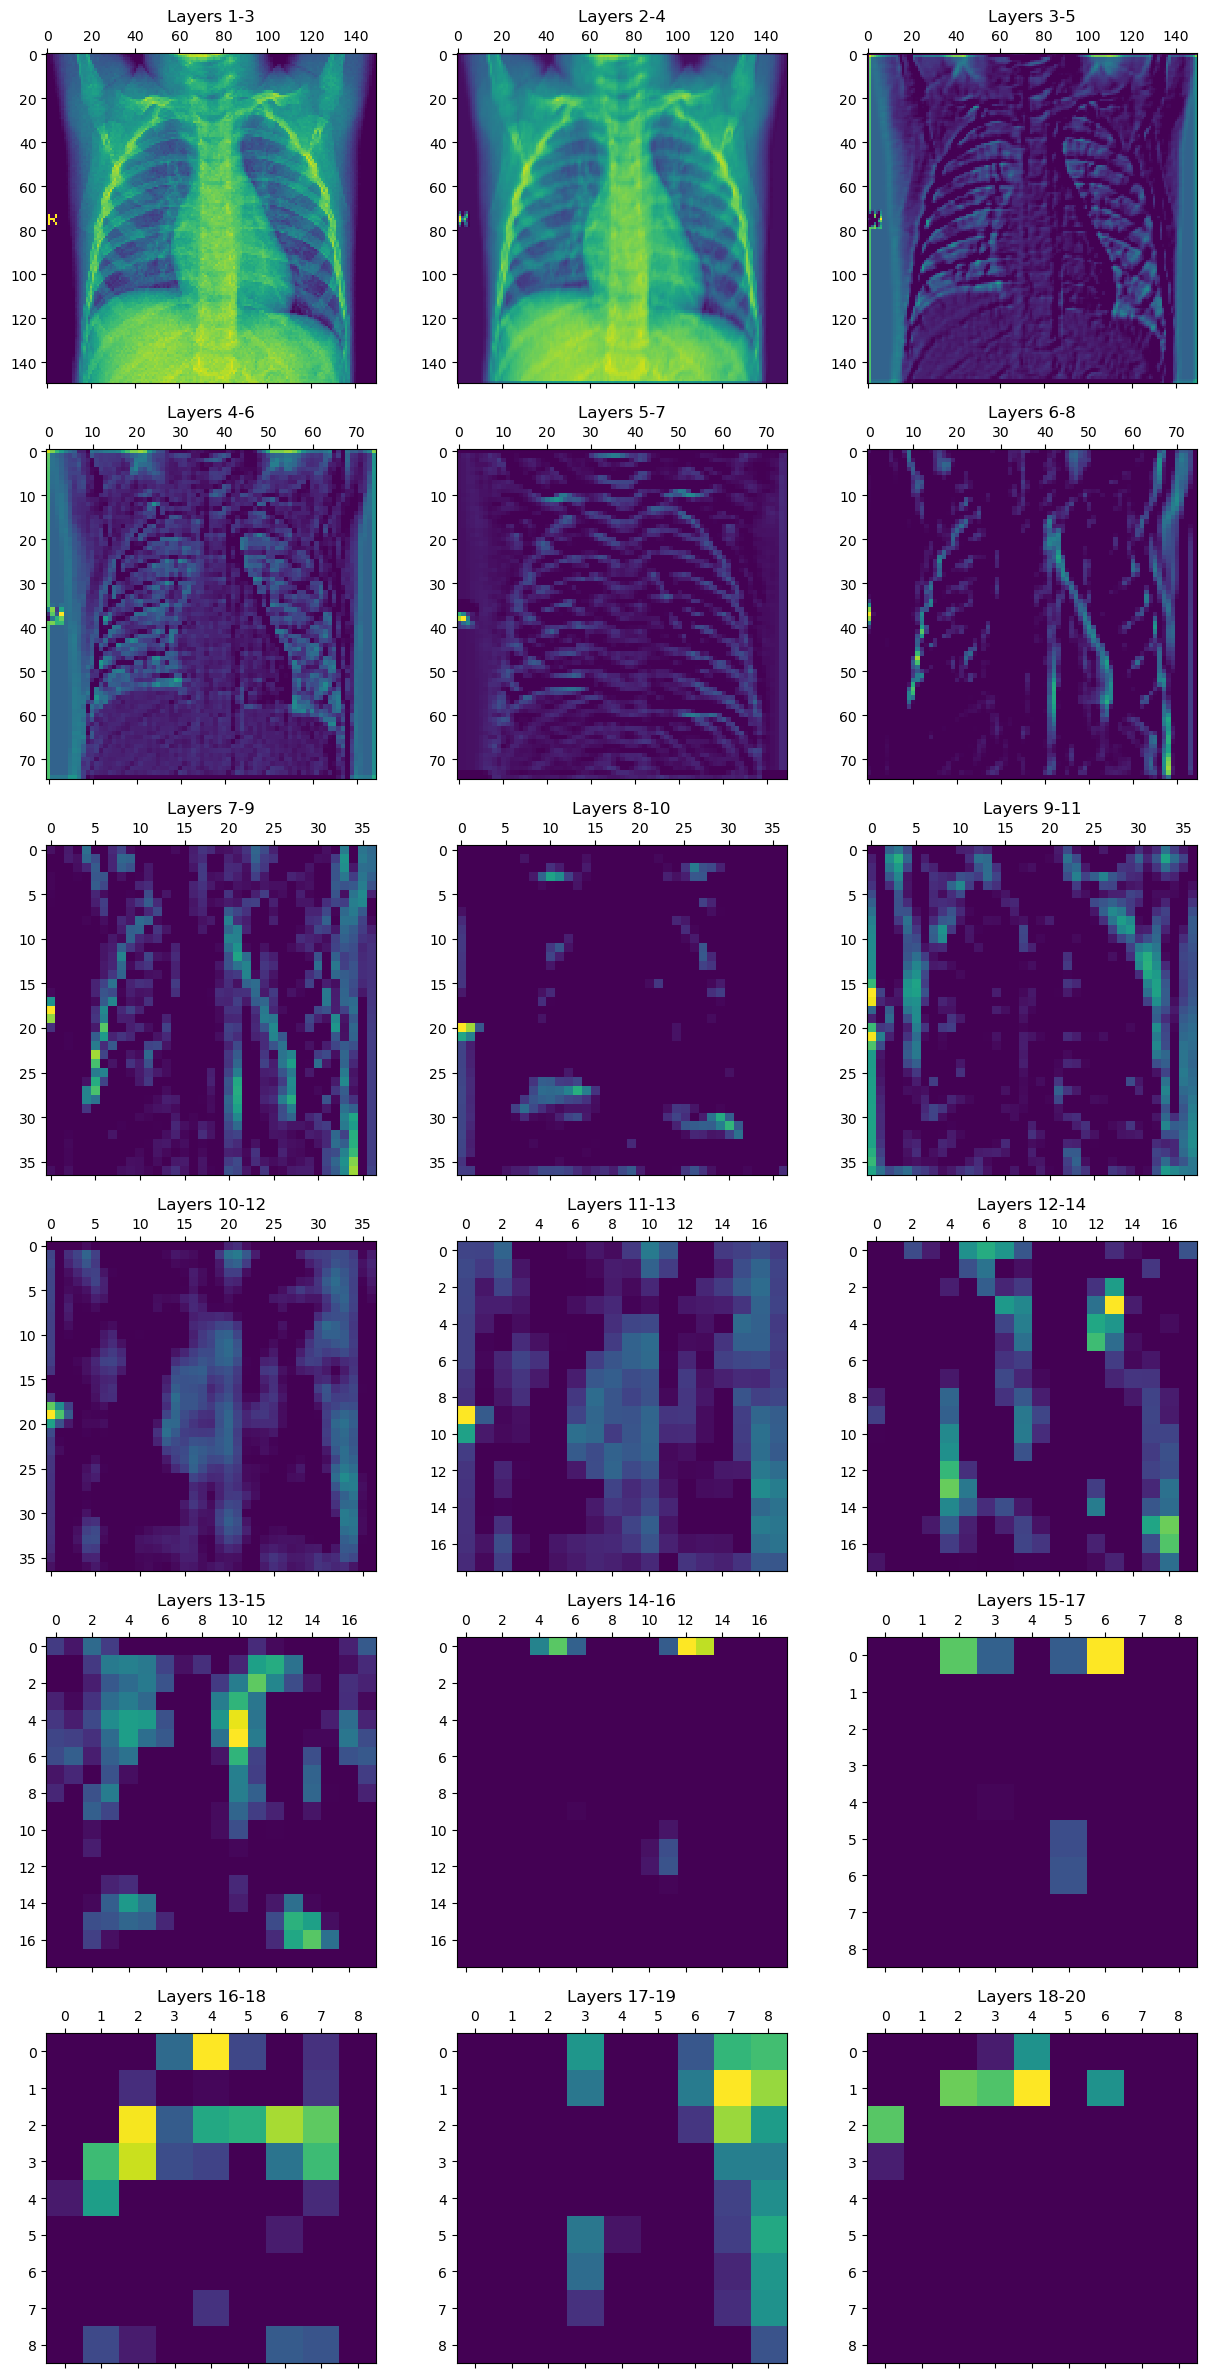

In [83]:
# Example usage
norm_img_path = train_path+'NORMAL/NORMAL-159556-0001.jpeg'

# Call function
visualize_activations(norm_img_path)

#### Pneumonia Image

1/1 [==============================] - 0s 277ms/step


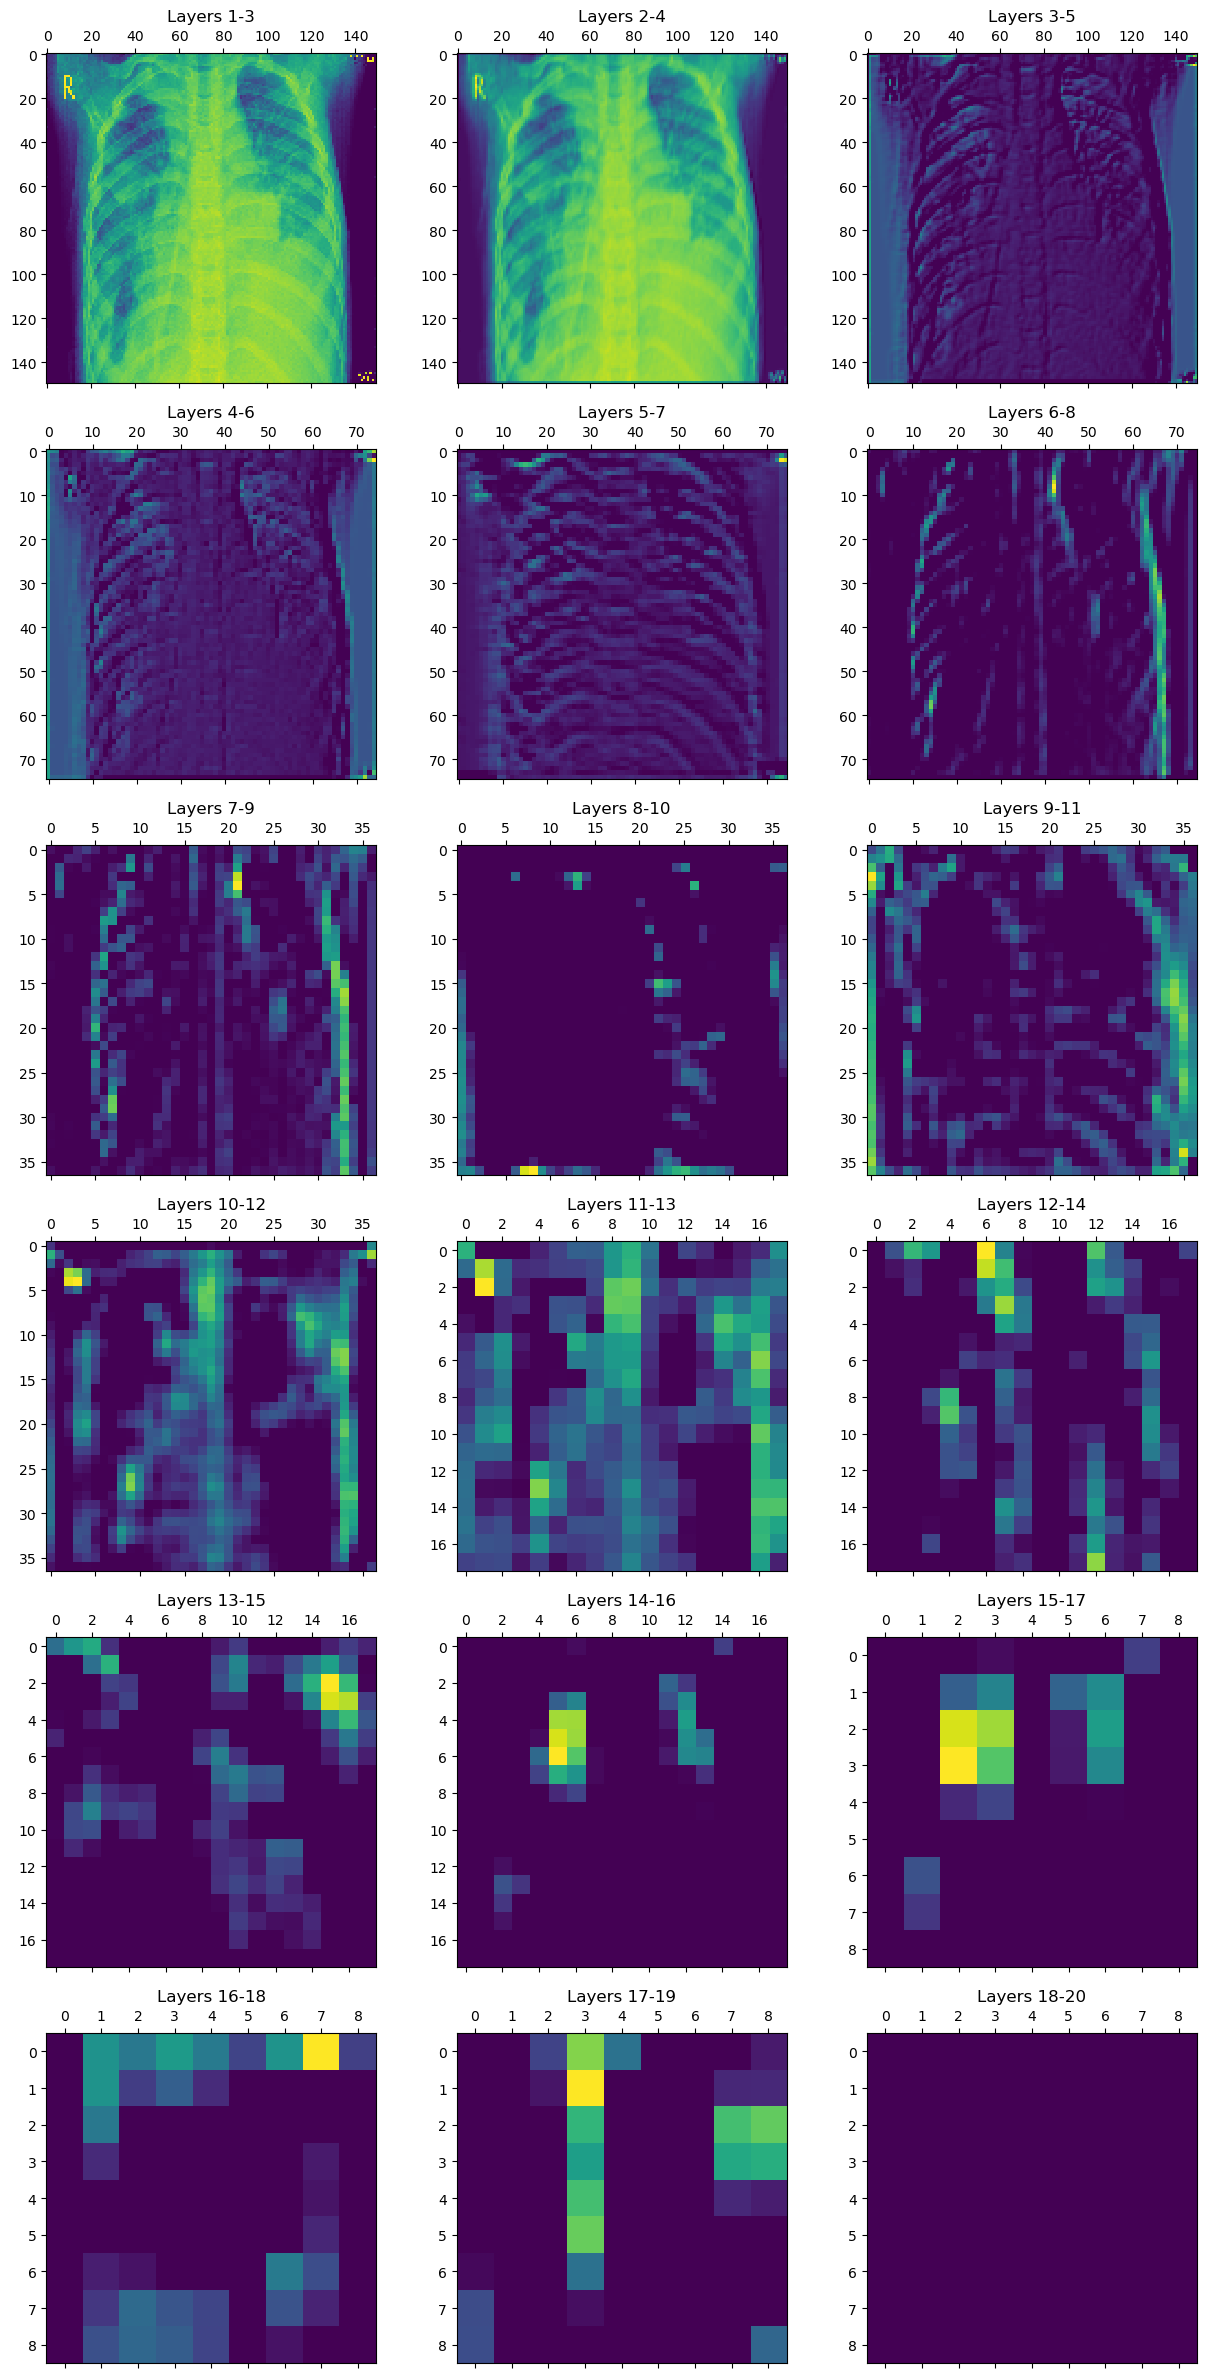

In [92]:
# Get an example image
pneu_img_path = train_path+'PNEUMONIA/BACTERIA-292199-0001.jpeg'

# Call function
visualize_activations(pneu_img_path)

# 6. EVALUATION

* **Precision:** the proportion of true positive predictions out of all positive predictions. 
* **Recall:** the proportion of true positive predictions out of all actual positive cases. 
* **F1-score:** the harmonic mean of precision and recall.

## 6.1. Prediction on Test

In [41]:
y_test = test_generator.classes
y_pred = Model_1.predict(test_generator)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0

20/20 [==============================] - 15s 736ms/step


## 6.2. Classification Report

In [51]:
results_df

,Model,Test Loss,Test Accuracy,Test F1 Score,Test Recall,Test Precision
0,Model 1,0.483971,0.883013,0.994872,0.914016,0.603486
1,Model 2,1.231155,0.597756,0.356410,0.525520,0.661871


## 6.3. Confusion Matrix

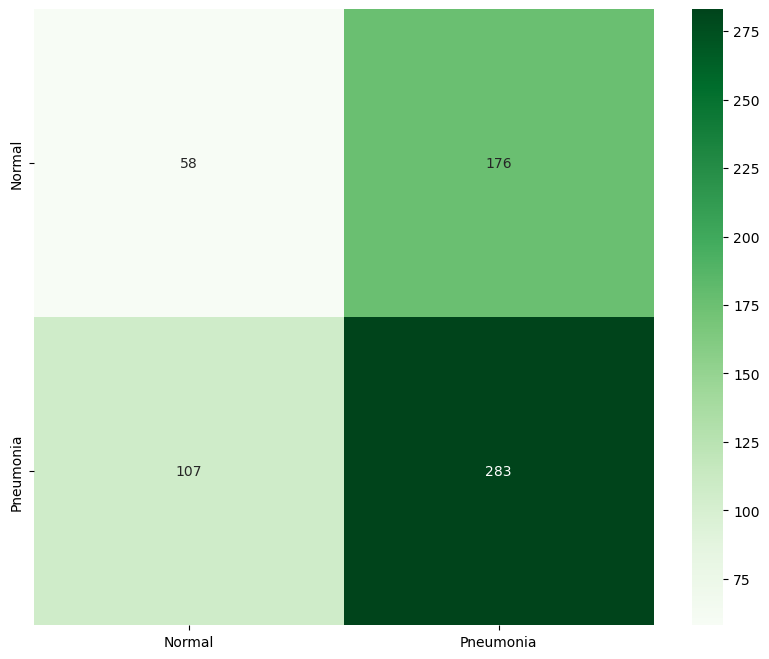

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,
           fmt='.3g',xticklabels=['Normal', 'Pneumonia'],
           yticklabels=['Normal', 'Pneumonia'],cmap='Greens')
plt.show()


## 6.4. Learning Curves

* Model Accuarcy

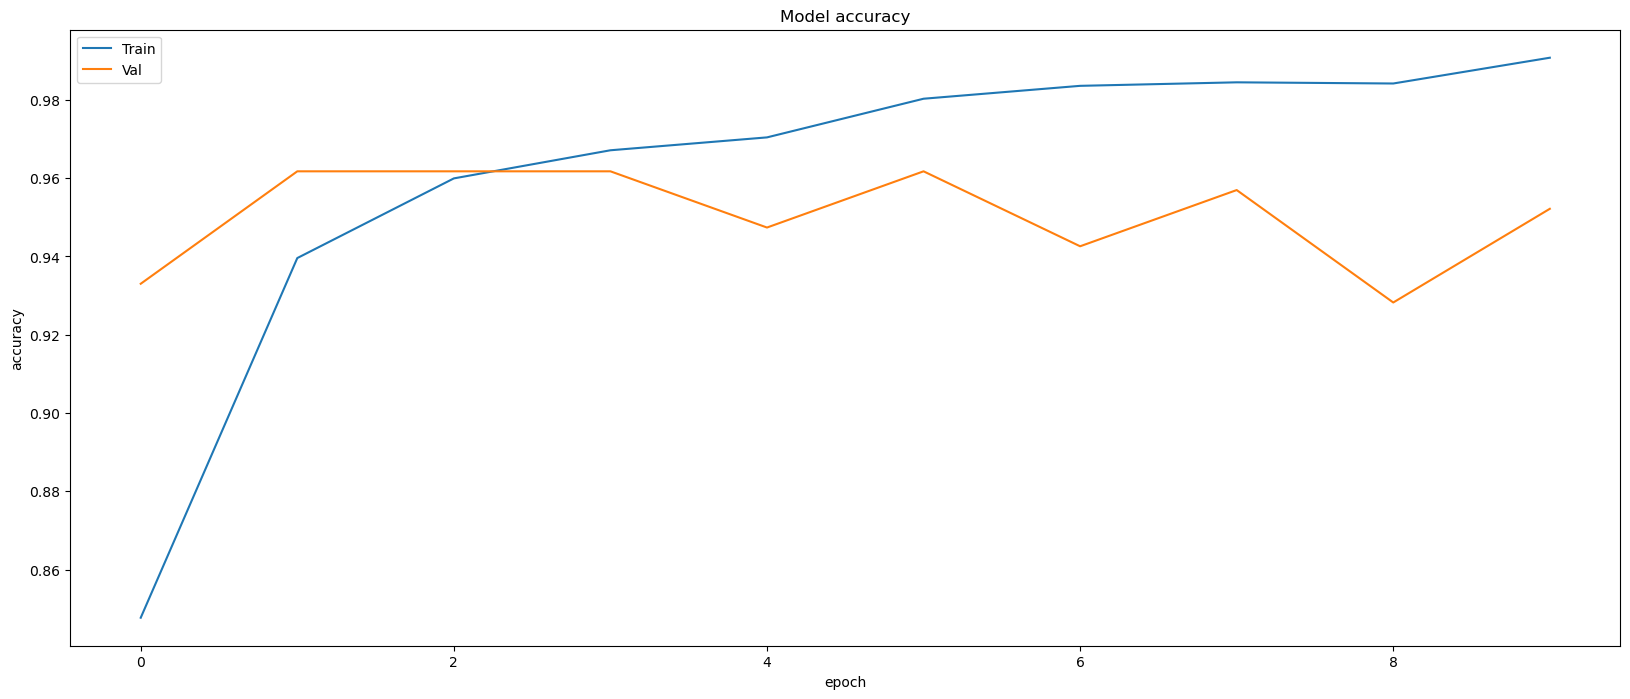

In [45]:
# Plot the training and validation accuracy
plt.figure(figsize=(20,8))
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* Model Loss

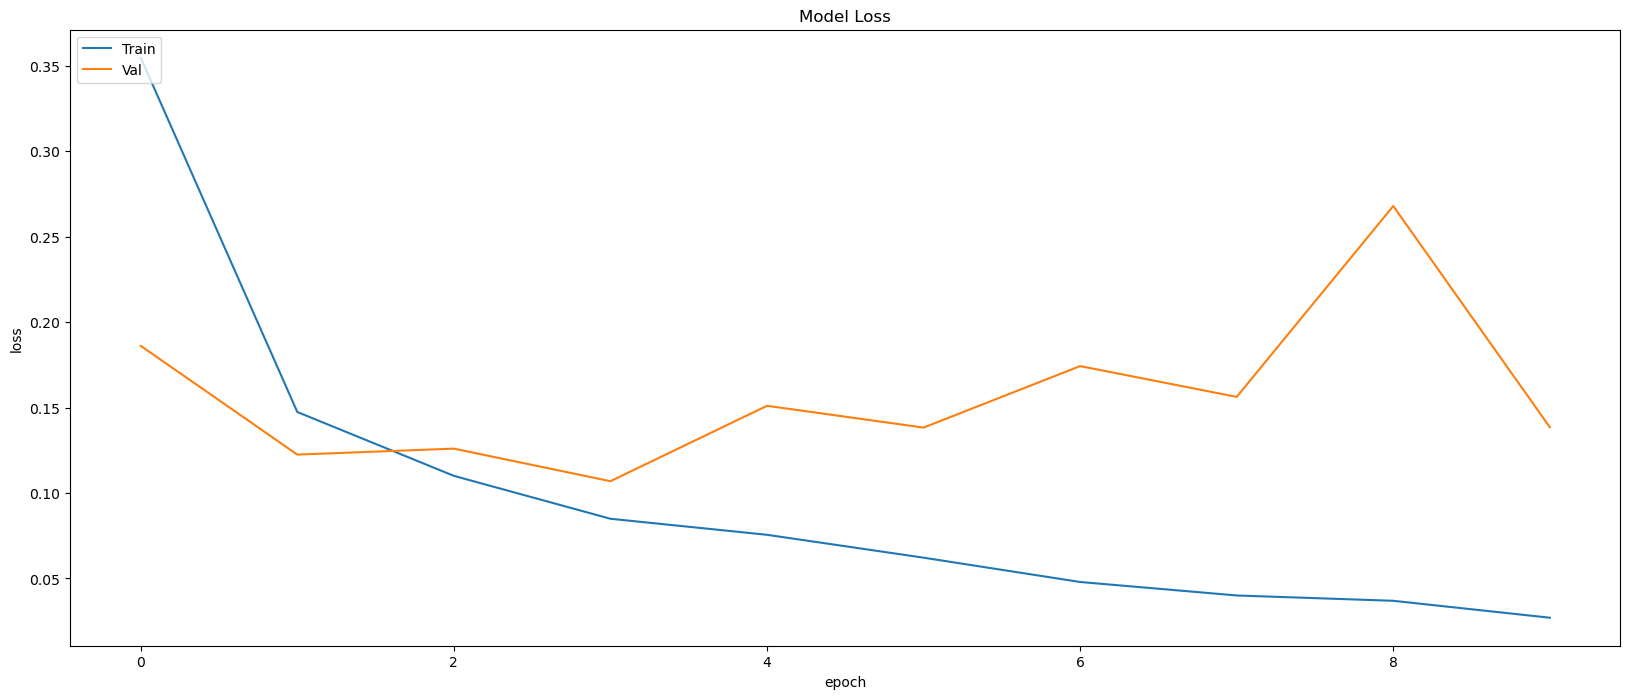

In [46]:
# Plot the training and validation loss
plt.figure(figsize=(20,8))
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


* F1 Score

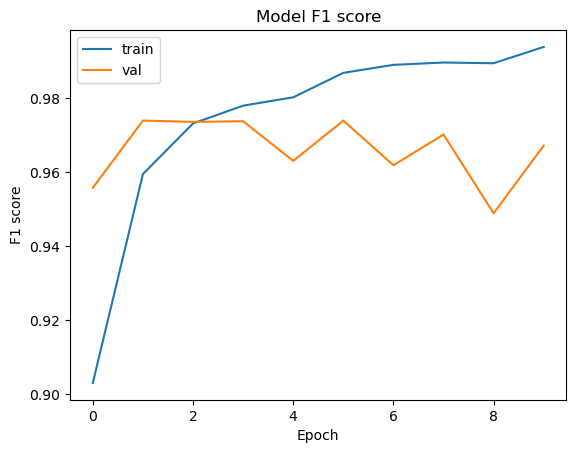

In [50]:
# F1 score plot
plt.plot(history_a.history['f1_score'], label='Training F1 score')
plt.plot(history_a.history['val_f1_score'], label='Validation F1 score')
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# 7. RECOMENDATIONS

1. This model can be used by pediatricians to quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Where trained medical professionals may not be readily available the model can be used to increase the accessibility of pneumonia diagnosis in low-resource settings.
3. The model can be used to potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. It can be used for further research and development by contributing to the development of a larger dataset for pneumonia diagnosis 
5. The model can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

##  7.1 Challenging the Solution

* Due to the fact that the images were obtained from a particular hospital and may not be applicable to other populations, one limitation of the dataset is that it might not be representative of all Chest X-Ray images.
* Furthermore, because there are fewer pneumonia cases than normal cases, the dataset may be skewed. This could impair the model's ability to accurately classify pneumonia cases.
* Another limitation is that the dataset does not include any information about the patients' demographics or medical histories, which could be useful in predicting pneumonia.

# 8. CONCLUSIONS

Based on the training results, the VGG16 model achieved an accuracy of approximately 88% on the validation set.
The recall score for the pneumonia class was consistently at 91%, which indicates that the model was able to correctly identify all instances of pneumonia in the validation set.
The loss values for the model were decreasing across epochs, which indicates that the model was learning and improving over time.

# 9.DEPLOYMENT

1. Saving the final model.
2. Using Streamlit we create a basic webpage.
3. Using tensforflow we load the model.
4. Prompt user to upload image.
5. Process the image by changing to an array.
6. Using the uploaded image we predict the image.
7. Displaying the results of the prediction.
